## One-bin Association/Dissociation reaction `A + B <-> C`
### with 1st-order kinetics for each species, taken to equilibrium

Diffusion not applicable (just 1 bin)

See also the experiment _"reactions_single_compartment/react_3"_  

### TAGS :  "reactions 1D", "basic"

In [1]:
LAST_REVISED = "June 6, 2025"
LIFE123_VERSION = "1.0.0rc6"        # Library version this experiment is based on

In [2]:
#import set_path                    # Using MyBinder?  Uncomment this before running the next cell!

In [3]:
#import sys, os
#os.getcwd()
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path

from experiments.get_notebook_info import get_notebook_basename

from life123 import ChemData, BioSim1D, check_version

from life123 import GraphicLog

In [4]:
check_version(LIFE123_VERSION)

OK


In [5]:
# Initialize the HTML logging
log_file = get_notebook_basename() + ".log.htm"    # Use the notebook base filename for the log file

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_2"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js")

-> Output will be LOGGED into the file 'reaction_4.log.htm'


In [6]:
# Initialize the system.  NOTE: Diffusion not applicable (using just 1 bin)
chem_data = ChemData(names=["A", "B", "C"], plot_colors=['red', 'darkorange', 'green'])

bio = BioSim1D(n_bins=1, chem_data=chem_data)

bio.set_uniform_concentration(chem_index=0, conc=10.)
bio.set_uniform_concentration(chem_index=1, conc=50.)
bio.set_uniform_concentration(chem_index=2, conc=20.)

bio.describe_state()

SYSTEM STATE at Time t = 0:
1 bins and 3 chemical species


,Species,Diff rate,Bin 0
0,A,None,10.0
1,B,None,50.0
2,C,None,20.0


In [7]:
# Specify the reaction
reactions = bio.get_reactions()

# Reaction A + B <-> C , with 1st-order kinetics for each species
reactions.add_reaction(reactants=["A" , "B"], products="C",
                       forward_rate=5., reverse_rate=2.)

reactions.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: A + B <-> C  (kF = 5 / kR = 2 / delta_G = -2,271.4 / K = 2.5) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {"B" (darkorange), "C" (green), "A" (red)}


In [8]:
# Send the plot of the reaction network to the HTML log file
reactions.plot_reaction_network("vue_cytoscape_2")

[GRAPHIC ELEMENT SENT TO LOG FILE `reaction_4.log.htm`]


In [9]:
# Let's enable history - by default for all chemicals and all bins
bio.enable_history(take_snapshot=True, caption="Initial state")

History enabled for bins None and chemicals None (None means 'all')


In [10]:
bio.get_bin_history(bin_address=0)

,SYSTEM TIME,A,B,C,caption
0,0.0,10.0,50.0,20.0,Initial state


### <a name="sec_2_first_step"></a>First step

In [11]:
# First step
bio.react(time_step=0.002, n_steps=1)
bio.describe_state()

System Time is now: 0.002
SYSTEM STATE at Time t = 0.002:
1 bins and 3 chemical species


,Species,Diff rate,Bin 0
0,A,None,5.08
1,B,None,45.08
2,C,None,24.92


In [12]:
bio.get_bin_history(bin_address=0)

,SYSTEM TIME,A,B,C,caption
0,0.000,10.00,50.00,20.00,Initial state
1,0.002,5.08,45.08,24.92,


### <a name="sec_2"></a>Numerous more steps

In [13]:
# Numerous more steps
bio.react(time_step=0.002, n_steps=29)

bio.describe_state()

System Time is now: 0.06
SYSTEM STATE at Time t = 0.06:
1 bins and 3 chemical species


,Species,Diff rate,Bin 0
0,A,None,0.294878
1,B,None,40.294878
2,C,None,29.705122


### <a name="sec_2_equilibrium"></a>Equilibrium

Consistent with the 5/2 ratio of forward/reverse rates (and the 1st order reactions),
the systems settles in the following equilibrium:  
[A] = 0.29487831 , [B] = 40.29487831 , [C] = 29.70512169

In [14]:
# Verify that the reaction has reached equilibrium
bio.get_reaction_handler().is_in_equilibrium(rxn_index=0, conc=bio.bin_snapshot(bin_address = 0))

A + B <-> C
Current concentrations: [A] = 0.2949 ; [B] = 40.29 ; [C] = 29.71
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 2.49999
    Formula used:  [C] / ([A][B])
2. Ratio of forward/reverse reaction rates: 2.5
Discrepancy between the two values: 0.0003107 %
Reaction IS in equilibrium (within 1% tolerance)



True

In [15]:
bio.get_bin_history(bin_address=0)

,SYSTEM TIME,A,B,C,caption
0,0.000,10.000000,50.000000,20.000000,Initial state
1,0.002,5.080000,45.080000,24.920000,
2,0.004,2.889616,42.889616,27.110384,
3,0.006,1.758712,41.758712,28.241288,
4,0.008,1.137262,41.137262,28.862738,
5,0.010,0.784874,40.784874,29.215126,
6,0.012,0.581625,40.581625,29.418375,
7,0.014,0.463266,40.463266,29.536734,
8,0.016,0.393960,40.393960,29.606040,
9,0.018,0.353248,40.353248,29.646752,


## Note: `A` (now largely depleted) is largely the limiting reagent

## Plots of changes of concentration with time

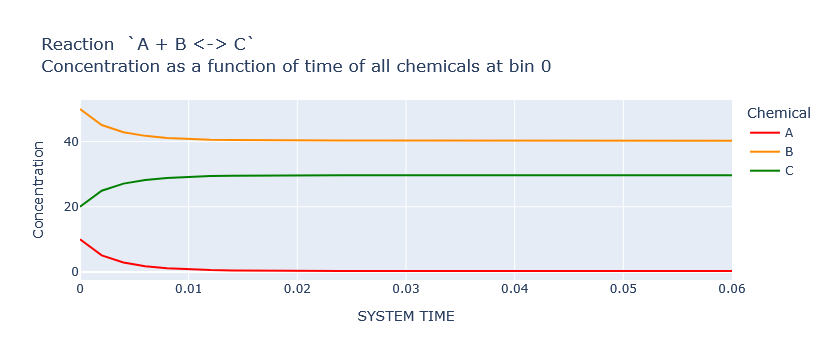

In [17]:
bio.plot_history_single_bin(bin_address=0, 
                            title_prefix="Reaction  `A + B <-> C`")

## For more in-depth analysis of this reaction, including variable time steps, see the experiment _"reactions_single_compartment/react_3"_ 